In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Wine.csv')
data.head()

1  14.23  1.71  2.43  15.6  127  ...   .28  2.29  5.64  1.04  3.92  1065
0  1  13.20  1.78  2.14  11.2  100  ...  0.26  1.28  4.38  1.05  3.40  1050
1  1  13.16  2.36  2.67  18.6  101  ...  0.30  2.81  5.68  1.03  3.17  1185
2  1  14.37  1.95  2.50  16.8  113  ...  0.24  2.18  7.80  0.86  3.45  1480
3  1  13.24  2.59  2.87  21.0  118  ...  0.39  1.82  4.32  1.04  2.93   735
4  1  14.20  1.76  2.45  15.2  112  ...  0.34  1.97  6.75  1.05  2.85  1450

[5 rows x 14 columns]

In [ ]:
data.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

data.head(5)

name  alcohol  malicAcid   ash  ...  colorIntensity   hue  od280_od315  proline
0     1    13.20       1.78  2.14  ...            4.38  1.05         3.40     1050
1     1    13.16       2.36  2.67  ...            5.68  1.03         3.17     1185
2     1    14.37       1.95  2.50  ...            7.80  0.86         3.45     1480
3     1    13.24       2.59  2.87  ...            4.32  1.04         2.93      735
4     1    14.20       1.76  2.45  ...            6.75  1.05         2.85     1450

[5 rows x 14 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 177 non-null    int64  
 1   alcohol              177 non-null    float64
 2   malicAcid            177 non-null    float64
 3   ash                  177 non-null    float64
 4   ashalcalinity        177 non-null    float64
 5   magnesium            177 non-null    int64  
 6   totalPhenols         177 non-null    float64
 7   flavanoids           177 non-null    float64
 8   nonFlavanoidPhenols  177 non-null    float64
 9   proanthocyanins      177 non-null    float64
 10  colorIntensity       177 non-null    float64
 11  hue                  177 non-null    float64
 12  od280_od315          177 non-null    float64
 13  proline              177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


<Figure size 1440x1440 with 0 Axes>

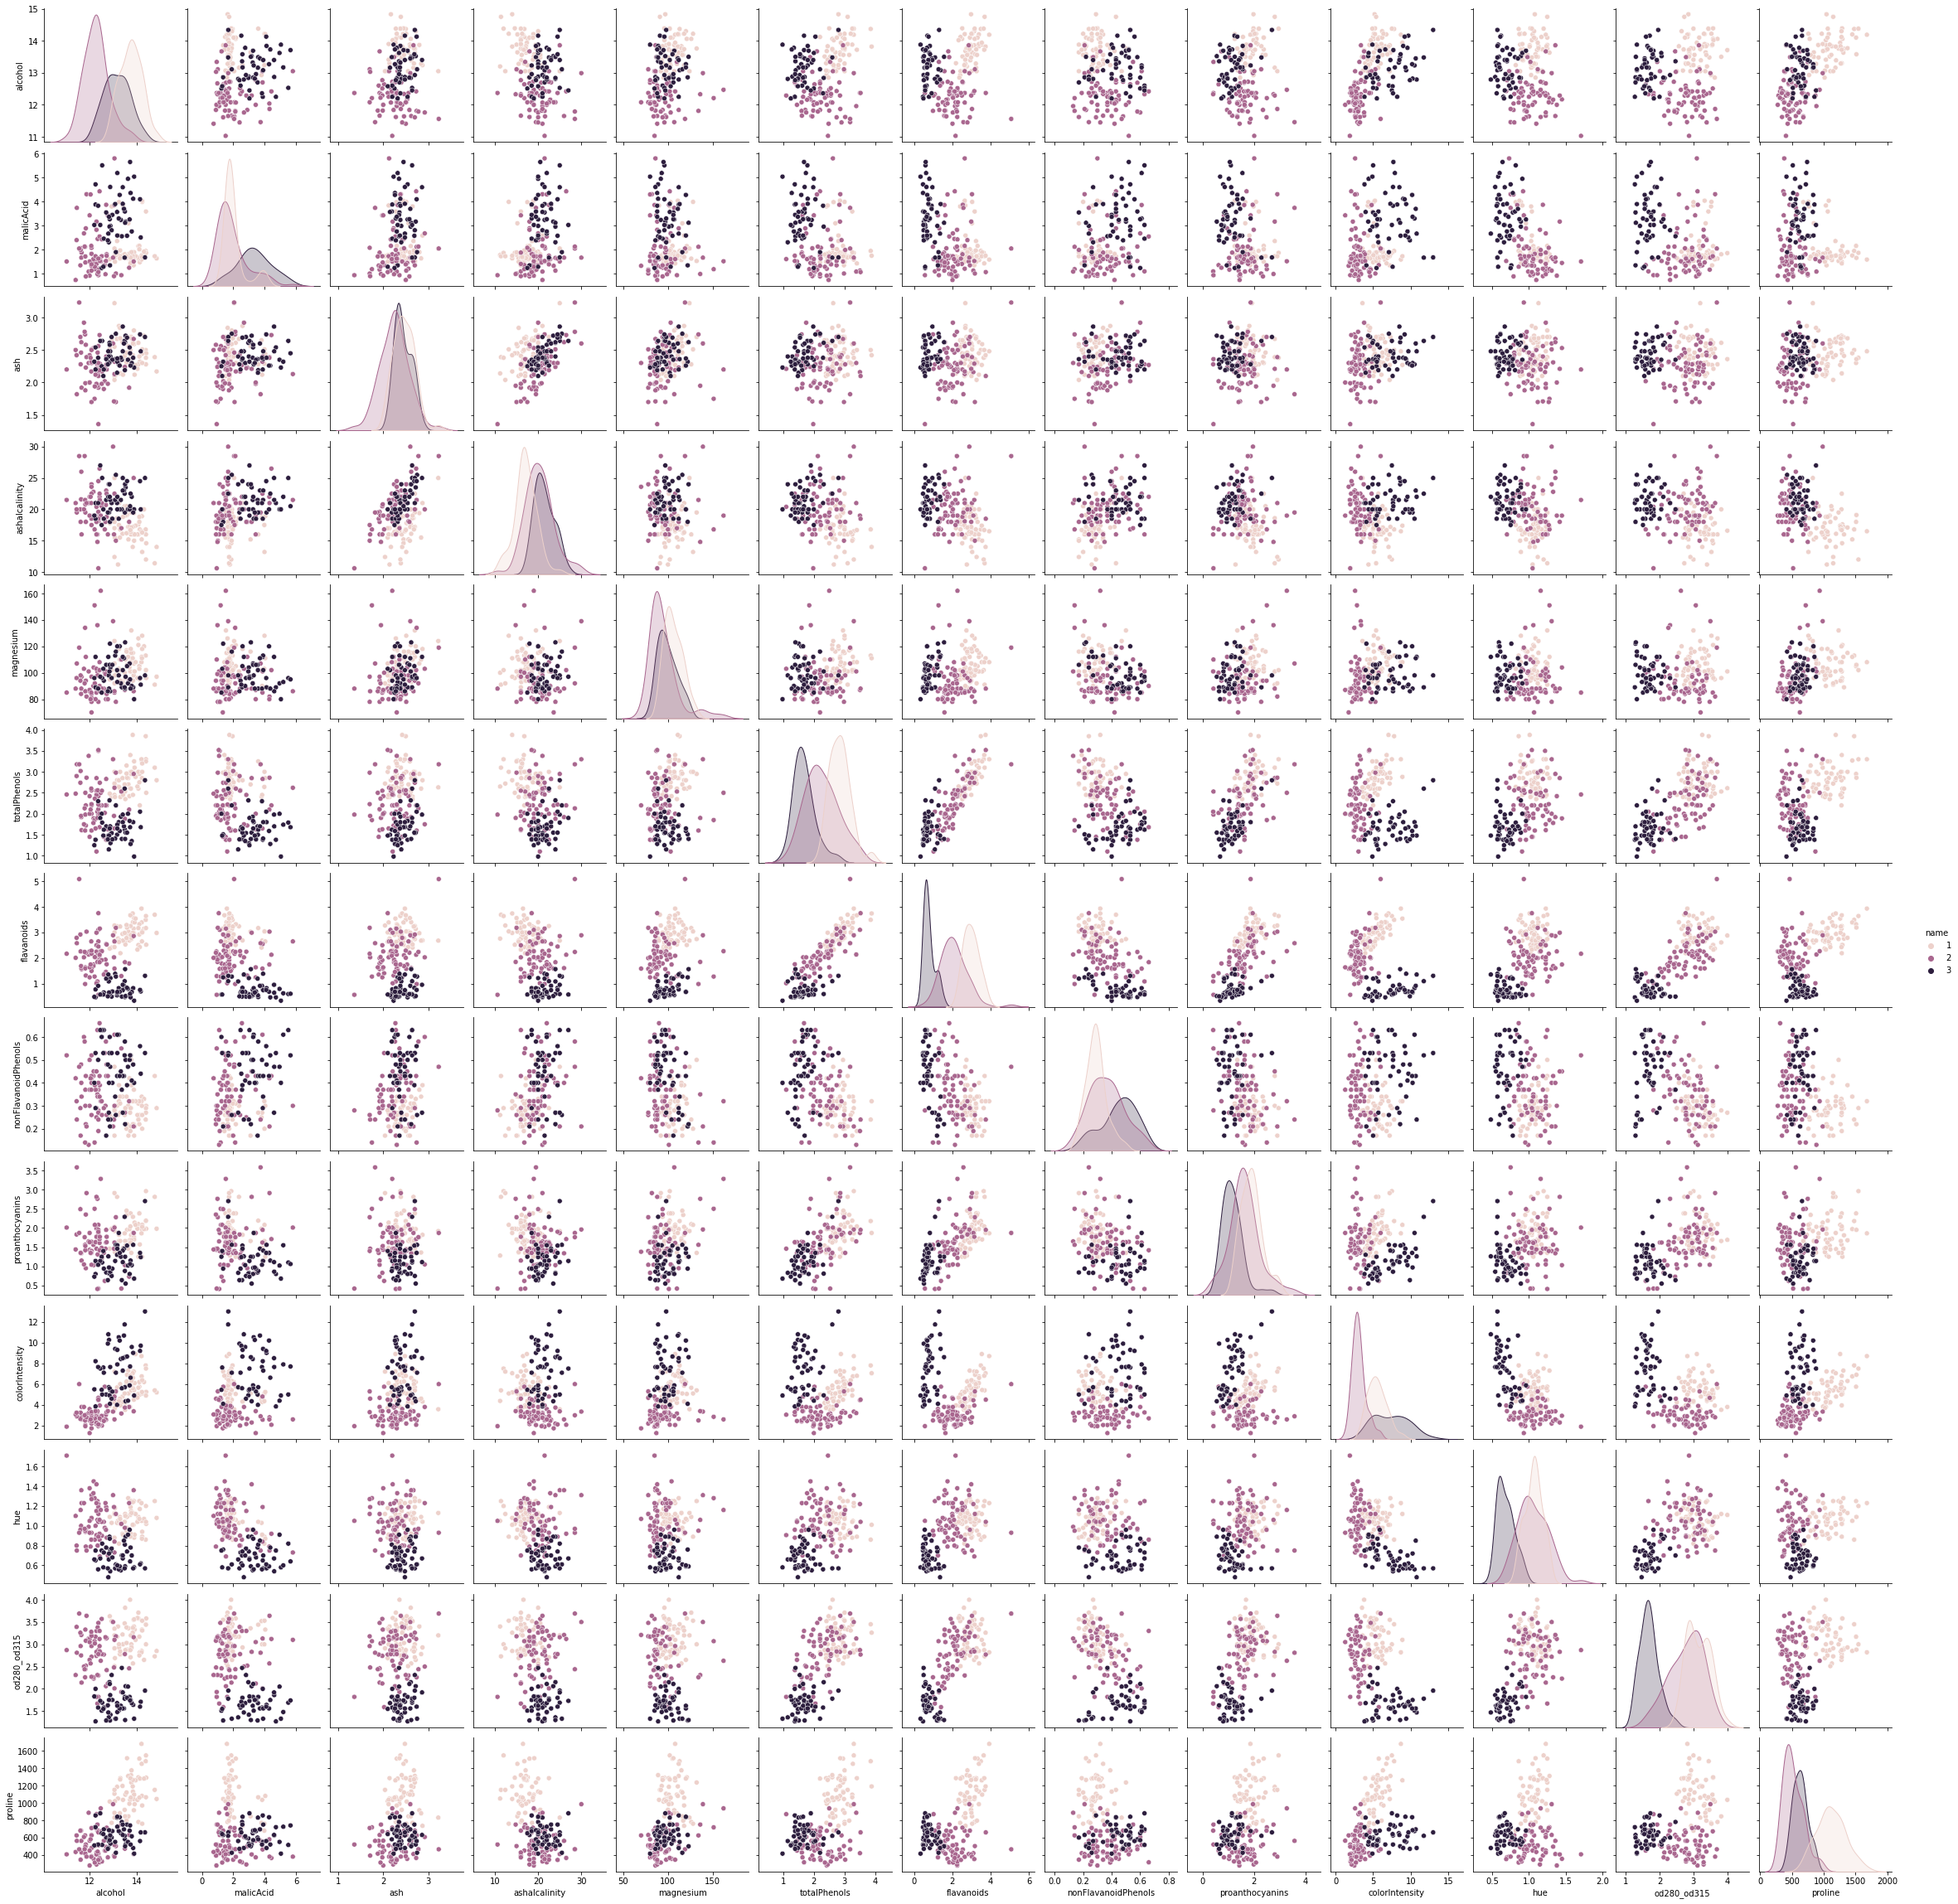

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, hue='name')
plt.show()
plt.close()

In [ ]:
features = data.drop(['proline'], axis=1)
target = data['proline']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

**Logistic Regression:**

In [ ]:
logreg_model = LogisticRegression(max_iter=100, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 53.913%
Testing Accuracy: 1.613%


**K-Nearest Neighbours:**

In [ ]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

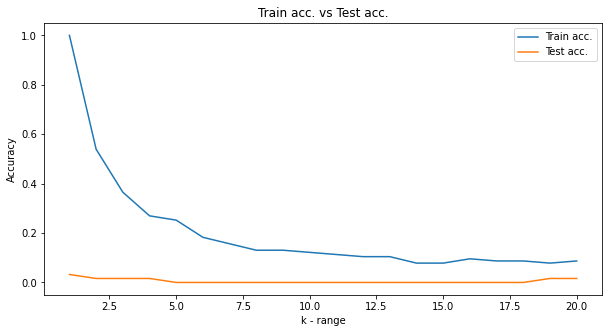

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 7.826%
Testing Accuracy: 0.000%


**DECISION TREES:**

**CART DT**

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 58.261%
Testing Accuracy: 0.000%


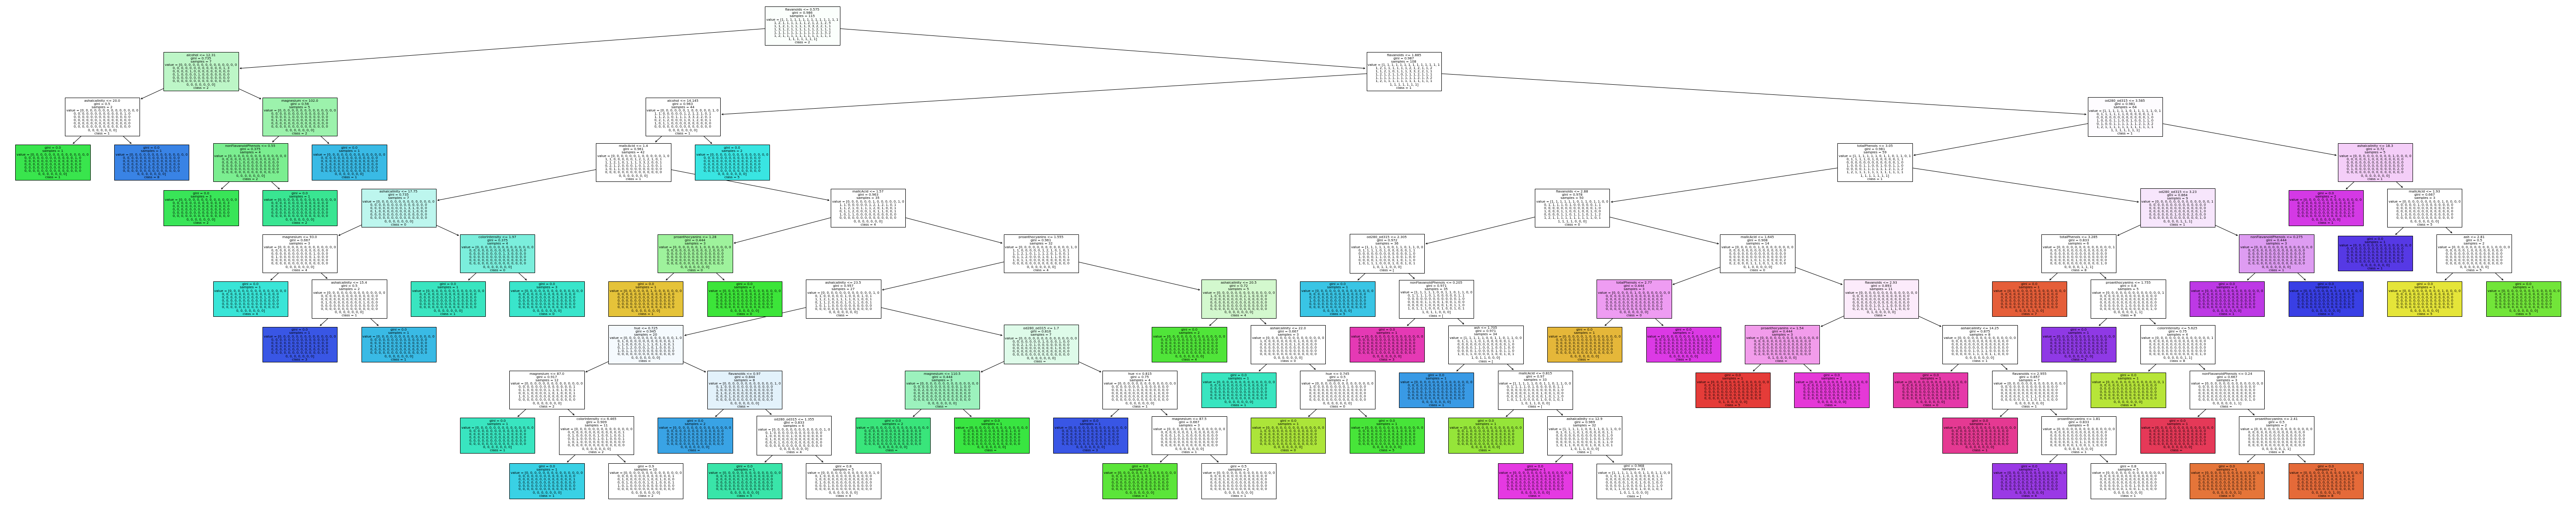

In [ ]:
fig = plt.figure(figsize=(100,20))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=str(data['proline'].unique()))
plt.show()

**ID3 DT**

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 0.000%


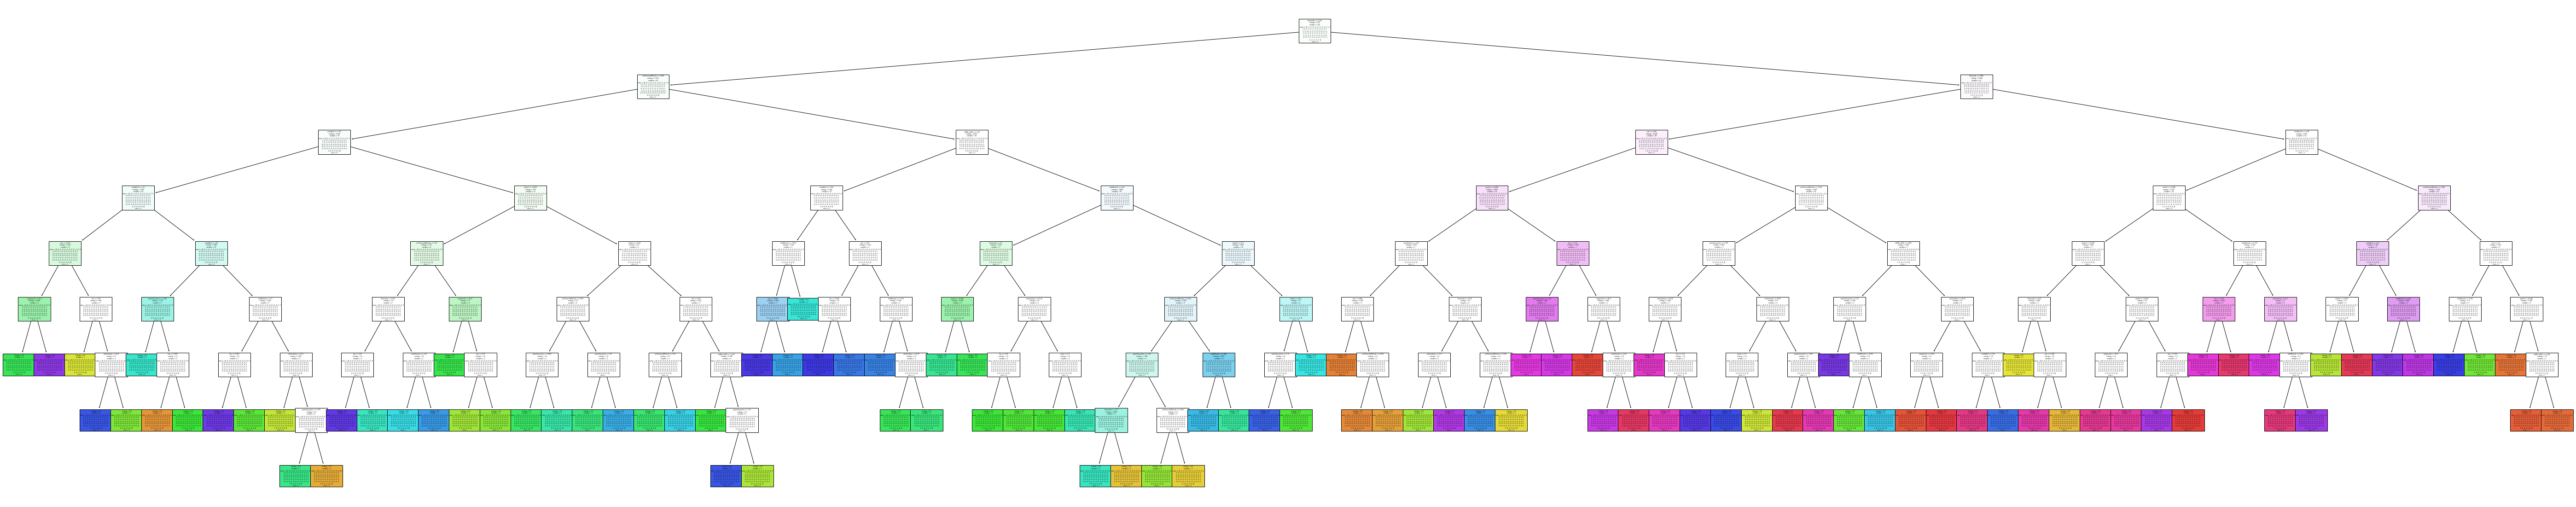

In [ ]:
fig = plt.figure(figsize=(100, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=str(data['proline'].unique()))
plt.show()